In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-open-policing-project/police_project.csv


In [2]:
df=pd.read_csv('../input/stanford-open-policing-project/police_project.csv')

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [5]:
df1=df.copy()

In [6]:
df1.drop('county_name',axis=1,inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [8]:
df1.drop(df1.iloc[[],[0,1,3,4,5,6,8,9,10,11,12,13]],axis=1,inplace=True)

In [9]:
df1.head()

,driver_gender,violation
0,M,Speeding
1,M,Speeding
2,M,Speeding
3,M,Other
4,F,Speeding


In [10]:
df2=df.copy()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [12]:
df2.drop(df2.iloc[[],[0,1,2,4,5,6,7,8,10,11,12,13,14]],axis=1,inplace=True)

In [13]:
df1.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [14]:
df1.driver_gender.value_counts(normalize=True)

M    0.727901
F    0.272099
Name: driver_gender, dtype: float64

In [15]:
df1.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [16]:
df1.violation.value_counts(normalize=True)

Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

In [17]:
df1[df1.violation=='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [18]:
df1[df1.violation=='Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [19]:
df1[df1.driver_gender=='M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [20]:
df1[df1.driver_gender=='M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [21]:
df1[df1.driver_gender=='F'].violation.value_counts()

Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64

In [22]:
df1[df1.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   driver_gender     86406 non-null  object
 1   search_conducted  91741 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 806.4+ KB


In [24]:
df2[df2.search_conducted==True].driver_gender.value_counts()

M    2725
F     471
Name: driver_gender, dtype: int64

In [25]:
df2.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [26]:
df2.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [27]:
df2_1=df.copy()

In [28]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [29]:
df2_1.drop(df2_1.iloc[[],[0,1,2,4,5,6,7,10,11,12,13,14]],axis=1,inplace=True)

In [30]:
df2_1.head()

,driver_gender,violation,search_conducted
0,M,Speeding,False
1,M,Speeding,False
2,M,Speeding,False
3,M,Other,False
4,F,Speeding,False


In [31]:
df2_1.groupby(['search_conducted','violation']).driver_gender.value_counts()

search_conducted  violation            driver_gender
False             Equipment            M                 7935
                                       F                 2381
                  Moving violation     M                12241
                                       F                 3088
                  Other                M                 3456
                                       F                  651
                  Registration/plates  M                 2152
                                       F                  946
                  Seat belt            M                 2229
                                       F                  627
                  Speeding             M                32157
                                       F                15347
True              Equipment            M                  598
                                       F                  106
                  Moving violation     M                  779
                 

In [32]:
df2_1[df2_1.search_conducted==True].violation.value_counts()

Speeding               957
Moving violation       895
Equipment              704
Registration/plates    334
Other                  210
Seat belt               96
Name: violation, dtype: int64

In [33]:
df2_1[df2_1.search_conducted==True].violation.value_counts(normalize=True)

Speeding               0.299437
Moving violation       0.280038
Equipment              0.220275
Registration/plates    0.104506
Other                  0.065707
Seat belt              0.030038
Name: violation, dtype: float64

In [34]:
df4=df.copy()

In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [36]:
df4.drop(df4.iloc[[],[0,1,2,4,5,6,7,10,11,12,13,14]],axis=1,inplace=True)

In [37]:
df4.head()

,driver_gender,violation,search_conducted
0,M,Speeding,False
1,M,Speeding,False
2,M,Speeding,False
3,M,Other,False
4,F,Speeding,False


In [38]:
df4.groupby(['search_conducted','violation']).driver_gender.value_counts()

search_conducted  violation            driver_gender
False             Equipment            M                 7935
                                       F                 2381
                  Moving violation     M                12241
                                       F                 3088
                  Other                M                 3456
                                       F                  651
                  Registration/plates  M                 2152
                                       F                  946
                  Seat belt            M                 2229
                                       F                  627
                  Speeding             M                32157
                                       F                15347
True              Equipment            M                  598
                                       F                  106
                  Moving violation     M                  779
                 

In [39]:
df3=df.copy()

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [41]:
df3.drop(df3.iloc[[],[0,1,2,3,4,5,6,7,8,11,12,13,14]],axis=1,inplace=True)

In [42]:
df3.head()

,search_conducted,search_type
0,False,NaN
1,False,NaN
2,False,NaN
3,False,NaN
4,False,NaN


In [43]:
df3.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [44]:
df3[df3.search_type =='Protective Frisk'].search_conducted.value_counts()

True    161
Name: search_conducted, dtype: int64

In [45]:
df3

,search_conducted,search_type
0,False,NaN
1,False,NaN
2,False,NaN
3,False,NaN
4,False,NaN
...,...,...
91736,False,NaN
91737,False,NaN
91738,False,NaN
91739,False,NaN


In [46]:
df5=df.copy()

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [48]:
df6=df.search_type.dropna()

In [49]:
df6

24       Incident to Arrest,Protective Frisk
40                            Probable Cause
41                            Probable Cause
80                        Incident to Arrest
106                           Probable Cause
                        ...                 
91494                     Incident to Arrest
91548                     Incident to Arrest
91672                     Incident to Arrest
91700    Probable Cause,Reasonable Suspicion
91708                     Incident to Arrest
Name: search_type, Length: 3196, dtype: object

In [50]:
x = df6.tolist()

In [51]:
a=[]
c = 0
for i in x:
    b = i.split(',')
    if "Protective Frisk" in b:
        a.append(b)
        c = c+1

In [52]:
c

274

In [53]:
df5.search_type

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
91736    NaN
91737    NaN
91738    NaN
91739    NaN
91740    NaN
Name: search_type, Length: 91741, dtype: object

In [54]:
df7=df5.search_type.tolist()

In [55]:
z = []

for i in df7:
    i = str(i)
    b = i.split(',')
    for j in b:
        if j not in z:
            z.append(j)

In [56]:
z

['nan',
 'Incident to Arrest',
 'Protective Frisk',
 'Probable Cause',
 'Reasonable Suspicion',
 'Inventory']

In [57]:
c = {'Incident to Arrest':[],
 'Protective Frisk':[],
 'Probable Cause':[],
 'Reasonable Suspicion':[],
 'Inventory':[]}
for i in c:
    for j in df7:
        j=str(j)
        j = j.split(',')
        if i in j:
            c[i].append(1)
        else:
            c[i].append(0)
#print(c)

In [58]:
df8 = pd.DataFrame(c)
df8.rename(columns={"Incident to Arrest": "Incident_to_Arrest", "Protective Frisk": "Protective_Frisk", "Probable Cause": "Probable_Cause", "Reasonable Suspicion": "Reasonable_Suspicion"},inplace=True)

In [59]:
df8.sum()

Incident_to_Arrest      1566
Protective_Frisk         274
Probable_Cause          1182
Reasonable_Suspicion     314
Inventory                439
dtype: int64

<AxesSubplot:ylabel='None'>

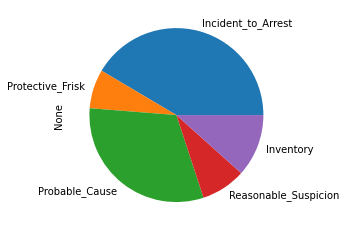

In [60]:
df8.sum().plot(kind = "pie")

In [61]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Incident_to_Arrest    91741 non-null  int64
 1   Protective_Frisk      91741 non-null  int64
 2   Probable_Cause        91741 non-null  int64
 3   Reasonable_Suspicion  91741 non-null  int64
 4   Inventory             91741 non-null  int64
dtypes: int64(5)
memory usage: 3.5 MB


In [62]:
df_created = pd.concat([df5,df8],axis=1)

In [63]:
df_cr_=df_created.copy()

In [64]:
df_cr_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stop_date             91741 non-null  object 
 1   stop_time             91741 non-null  object 
 2   county_name           0 non-null      float64
 3   driver_gender         86406 non-null  object 
 4   driver_age_raw        86414 non-null  float64
 5   driver_age            86120 non-null  float64
 6   driver_race           86408 non-null  object 
 7   violation_raw         86408 non-null  object 
 8   violation             86408 non-null  object 
 9   search_conducted      91741 non-null  bool   
 10  search_type           3196 non-null   object 
 11  stop_outcome          86408 non-null  object 
 12  is_arrested           86408 non-null  object 
 13  stop_duration         86408 non-null  object 
 14  drugs_related_stop    91741 non-null  bool   
 15  Incident_to_Arrest 

In [65]:
df_cr_.drop(df_cr_.iloc[[],[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,17,18,19]],axis=1,inplace=True)

In [66]:
df_cr_.head()

,search_conducted,Protective_Frisk
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0


In [67]:
df_cr_.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [68]:
df_cr_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   search_conducted  91741 non-null  bool 
 1   Protective_Frisk  91741 non-null  int64
dtypes: bool(1), int64(1)
memory usage: 806.4 KB


In [69]:
df_cr_.Protective_Frisk.value_counts()

0    91467
1      274
Name: Protective_Frisk, dtype: int64

In [70]:
df_cr_[df_cr_.search_conducted==True].Protective_Frisk.value_counts()

0    2922
1     274
Name: Protective_Frisk, dtype: int64

In [71]:
df_cr_[df_cr_.Protective_Frisk==1].search_conducted.value_counts()

True    274
Name: search_conducted, dtype: int64

In [72]:
df_yr = df.copy()

In [73]:
df_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [74]:
df_yr.stop_date.value_counts()

2012-01-11    69
2012-02-28    65
2007-05-16    62
2012-01-02    61
2007-01-10    60
              ..
2015-01-27     1
2005-12-25     1
2005-01-18     1
2010-12-25     1
2005-01-02     1
Name: stop_date, Length: 3768, dtype: int64

In [75]:
df_yr.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [76]:
df_yr['stop_date']=pd.to_datetime(df_yr.stop_date)

In [77]:
df_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  object        
 2   county_name         0 non-null      float64       
 3   driver_gender       86406 non-null  object        
 4   driver_age_raw      86414 non-null  float64       
 5   driver_age          86120 non-null  float64       
 6   driver_race         86408 non-null  object        
 7   violation_raw       86408 non-null  object        
 8   violation           86408 non-null  object        
 9   search_conducted    91741 non-null  bool          
 10  search_type         3196 non-null   object        
 11  stop_outcome        86408 non-null  object        
 12  is_arrested         86408 non-null  object        
 13  stop_duration       86408 non-null  object    

In [78]:
df_yr.loc[0,'stop_date'].day_name()

'Sunday'

In [79]:
df_yr['stop_date'].min()

Timestamp('2005-01-02 00:00:00')

In [80]:
df_yr['stop_date'].max()

Timestamp('2015-12-31 00:00:00')

In [81]:
df_yr['stop_date'].max() - df_yr['stop_date'].min()

Timedelta('4015 days 00:00:00')

In [82]:
df_yr['stop_date'].value_counts()

2012-01-11    69
2012-02-28    65
2007-05-16    62
2012-01-02    61
2007-01-10    60
              ..
2015-01-27     1
2005-12-25     1
2005-01-18     1
2010-12-25     1
2005-01-02     1
Name: stop_date, Length: 3768, dtype: int64

In [83]:
df_yr['stop_date'].value_counts()

2012-01-11    69
2012-02-28    65
2007-05-16    62
2012-01-02    61
2007-01-10    60
              ..
2015-01-27     1
2005-12-25     1
2005-01-18     1
2010-12-25     1
2005-01-02     1
Name: stop_date, Length: 3768, dtype: int64

In [84]:
df_yr['year']= pd.to_datetime(df_yr.stop_date,format="%Y")

In [85]:
dfy = df_yr['year'].tolist()

In [86]:
y = []

for i in dfy:
    i = str(i)
    w = i.split('-')
    if i.isnumeric() == True and len(i) == 4:
        for j in w:
            if j not in y:
                y.append(j)

In [87]:
y

[]